In [64]:
from photutils import Background2D, SigmaClip, MedianBackground
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

from skimage import color
from skimage import exposure

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
afmdata = np.genfromtxt('../Data/UnbackgroundedTXT/500nmGood-0')
afmdata= afmdata*(10**9)
height, width = afmdata.shape

In [31]:
sigma_clip = SigmaClip(sigma=3., iters=10)
bkg_estimator = MedianBackground()
bkg = Background2D(afmdata, (50, 50), filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

-16.189
1.01674876336


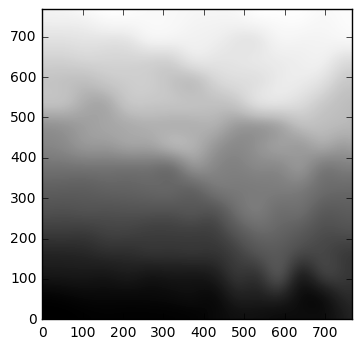

In [32]:
print(bkg.background_median)
print(bkg.background_rms_median)
plt.imshow(bkg.background, origin='lower', cmap='Greys_r')

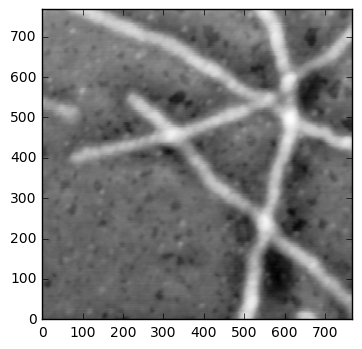

In [33]:
plt.imshow(afmdata - bkg.background, origin='lower', cmap='Greys_r')

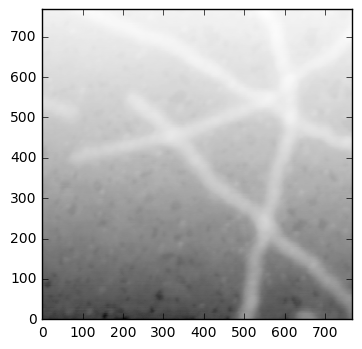

In [34]:
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(afmdata, norm=norm, origin='lower', cmap='Greys_r')


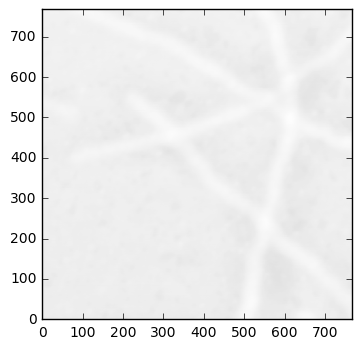

In [70]:
### This is the Backgrounded image shown two frames up. The frame below is super pale because I'm working
### on the histogram normalization

backgrounded = afmdata - bkg.background
plt.imshow(backgrounded,norm = norm, origin='lower', cmap='Greys_r')


float64


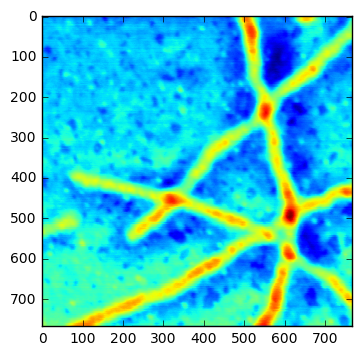

In [63]:
print (backgrounded.dtype)


bkggray = color.rgb2gray(backgrounded)
plt.imshow(bkggray)


In [68]:
nrmlzd = exposure.rescale_intensity(bkggray, in_range = 'image', out_range = 'uint8')
eqlizd = exposure.equalize_adapthist(norm, clip_limit = 0.03)
plt.imshow(eqlizd)

AttributeError: 'ImageNormalize' object has no attribute 'ndim'